### Zachowywanie przeindeksowanych danych

Przeindeksowanie Danych Procesowanych przez zewnętrzny prosty, skrypt. Potem dane są czyszczone z ewentualnch błedów

In [120]:
import pandas as pd
path = 'C:\\Users\\ldoma\\Downloads\\Rybnik\\'

Dane_Ostateczne_Processing = pd.read_csv(path+'Nowe_indeksy.csv')
Dane_Ostateczne_Processing = Dane_Ostateczne_Processing[Dane_Ostateczne_Processing['begin_id']!= 1000]
Dane_Ostateczne_Processing = Dane_Ostateczne_Processing[Dane_Ostateczne_Processing['begin_id']!= 29320]
Dane_Ostateczne_Processing = Dane_Ostateczne_Processing[Dane_Ostateczne_Processing['end_id']!= 1000]
Dane_Ostateczne_Processing = Dane_Ostateczne_Processing[Dane_Ostateczne_Processing['end_id']!= 29320]
Dane_Ostateczne_Processing


,card_num,date,week_day,time,begin_id,end_id
0,1047220043,2021-09-01,2,04:24:00,8,150
1,1047220043,2021-09-01,2,14:05:00,5,66
2,1047220043,2021-09-02,3,04:24:00,8,150
3,1047220043,2021-09-02,3,13:29:00,5,66
4,1047220043,2021-09-03,4,04:24:00,8,150
...,...,...,...,...,...,...
359532,501031531,2021-10-05,1,07:05:00,20,65
359533,501031531,2021-10-05,1,07:05:00,20,65
359534,501031531,2021-10-05,1,07:05:00,20,65
359535,501031531,2021-10-05,1,07:05:00,20,65


In [124]:
Dane_Ostateczne_Processing[(Dane_Ostateczne_Processing['end_id'] ==str(7)) & (Dane_Ostateczne_Processing['begin_id'] ==66)].count()

card_num    1110
date        1110
week_day    1110
time        1110
begin_id    1110
end_id      1110
dtype: int64

In [118]:
df_przystanki = pd.read_csv('C:\\Users\\ldoma\\Dokumenty\\Przystanki.csv',delimiter=';')
df_przystanki.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 402 entries, 0 to 401
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   name        402 non-null    object 
 1   id          402 non-null    int64  
 2   district    400 non-null    object 
 3   longitutde  402 non-null    float64
 4   latitude    402 non-null    float64
dtypes: float64(2), int64(1), object(2)
memory usage: 15.8+ KB


In [138]:
#Wypisanie unikalnych wartości dla sprawdzenia
Dane_Ostateczne_Processing['end_id'].unique()

array(['150', '66', '8', '171', '90', '42', '11', '3', '191', '6', '128',
       '40', '135', '122', '172', '120', '121', '174', '13', '5', '47',
       '12', '21', '301', '22', '16', '417', '68', '23', '70', '228',
       '259', '46', '71', '126', '9', '103', '65', '258', '48', '201',
       '377', '24', 296, 297, '10', '64', '133', '80', '107', '349',
       '291', '43', '101', '7', '344', '199', '102', '197', '288', '368',
       '27', '26', '17', '379', '286', '239', '196', '185', '229', '289',
       '59', '108', '58', '84', '63', '158', '153', '37', '41', '35',
       '178', '294', '175', '189', '14', '116', '184', '194', '123',
       '156', '240', '213', '217', '242', '127', '424', '220', '72', '97',
       '73', '82', '190', '67', '188', '373', '54', '404', '61', '96',
       '428', '204', '104', '45', '18', '159', '141', '19', '51', '69',
       '60', '295', '211', 91, '87', '44', '106', '105', '117', '86',
       '335', '4', '25', '56', '57', '85', '162', '160', '182', '192'

In [139]:
Dane_Ostateczne_Processing['end_id'] = Dane_Ostateczne_Processing['end_id'].astype(int)

In [140]:
Dane_Ostateczne_Processing.to_csv(path+ 'Przejazdy.csv',index=False)
#Ostateczny Przeprocesowany Plik z Przejazdami.

## Analiza Danych

### Godziny i Przystanki

In [5]:
import pandas as pd
import numpy as np
path = 'C:\\Users\\ldoma\\Downloads\\Rybnik\\'

Dane_Ostateczne_Processing = pd.read_csv(path+'Przejazdy.csv')
Dane_Ostateczne=Dane_Ostateczne_Processing

def create_hourly_data(hour1,hour2):
    times1 = str(hour1).zfill(2) +':' +str(0).zfill(2)+':00'
    times2 = str(hour2).zfill(2) +':' +str(0).zfill(2)+':00'
    tempowy_df = Dane_Ostateczne[(Dane_Ostateczne['time'].astype(str) > times1) & (Dane_Ostateczne['time'].astype(str) <times2)]
    tempowy_df.sort_values(by='begin_id',inplace=True)
    return tempowy_df.groupby('begin_id',dropna=False).count()['card_num']


df_hourly = pd.DataFrame(index = range(0,24), columns = Dane_Ostateczne['begin_id'].sort_values().unique())
df_hourly = df_hourly.T
df_hourly
temp_arr_2 = np.zeros(len(df_hourly.index))

for j in range(0,24):
    temp_df = create_hourly_data(j,j+1)
    temp_arr = np.zeros(len(df_hourly.index))

    for i in range(len(df_hourly.index)):
        try:
            temp_arr[i] = temp_df[df_hourly.index[i]]
        except:
            temp_arr[i] = 0
    temp_arr_2 = np.vstack((temp_arr_2,temp_arr))


Absolute_Values_Hourly = pd.DataFrame(temp_arr_2,columns =Dane_Ostateczne['begin_id'].sort_values().unique())
Absolute_Values_Hourly

C:\Users\ldoma\Anaconda\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':


,2,3,4,5,6,7,8,9,10,11,...,407,410,416,417,418,424,425,428,434,435
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,4.0,154.0,151.0,80.0,74.0,88.0,127.0,30.0,26.0,6.0,...,0.0,0.0,0.0,124.0,0.0,7.0,0.0,21.0,0.0,0.0
6,48.0,482.0,274.0,198.0,164.0,499.0,562.0,79.0,189.0,17.0,...,0.0,0.0,0.0,99.0,0.0,6.0,0.0,43.0,0.0,0.0
7,39.0,635.0,431.0,388.0,402.0,697.0,553.0,96.0,344.0,37.0,...,0.0,0.0,5.0,291.0,1.0,17.0,1.0,35.0,0.0,0.0
8,103.0,1009.0,434.0,704.0,415.0,854.0,465.0,133.0,502.0,20.0,...,0.0,5.0,6.0,105.0,0.0,8.0,0.0,93.0,0.0,3.0
9,85.0,741.0,338.0,479.0,267.0,1056.0,334.0,114.0,294.0,21.0,...,0.0,6.0,17.0,0.0,0.0,6.0,0.0,88.0,0.0,1.0


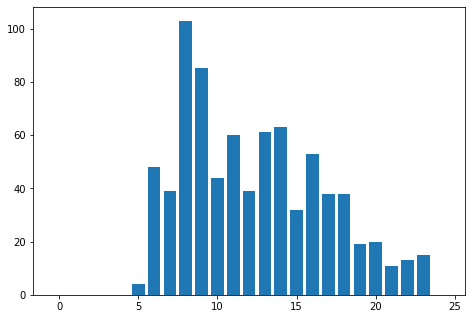

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

fig = plt.figure()


#Rozkład Całodzienny na Danym przystanku. 

ax = fig.add_axes([0,0,1,1])
ax.bar(Absolute_Values_Hourly.index,Absolute_Values_Hourly[2])
plt.show()

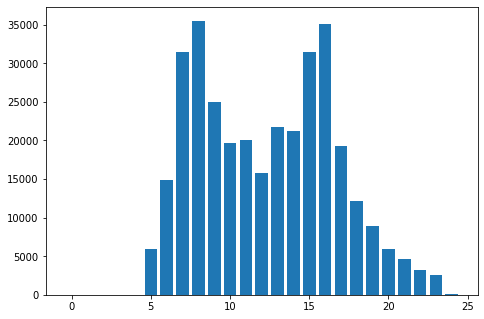

In [7]:
#Rozkład Godzinowy względem kazdego rzystanku na Danym przystanku. 
import seaborn as sns
import matplotlib.pyplot as plt

fig = plt.figure()


#Rozkład Całodzienny W całej Komunikacji przystanku. 

ax = fig.add_axes([0,0,1,1])
ax.bar(Absolute_Values_Hourly.index,Absolute_Values_Hourly.sum(axis = 1))
plt.show()

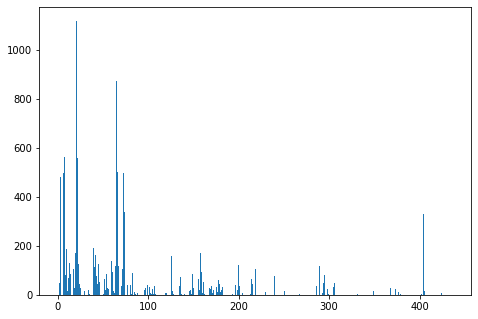

In [8]:
#Rozkład Godzinowy względem kazdego rzystanku na Danym przystanku. 
import seaborn as sns
import matplotlib.pyplot as plt

fig = plt.figure()


#Rozkład na każdym przystanku o danej godzinie 

ax = fig.add_axes([0,0,1,1])
ax.bar(Absolute_Values_Hourly.T.index,Absolute_Values_Hourly.T[6])
plt.show()

#### Sprawdzanie ewentualnych interakcji między ludźmi wysiadającymi na różnych przystankach

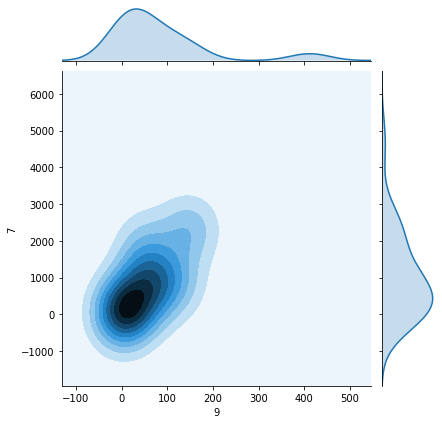

In [9]:
sns.jointplot(x =Absolute_Values_Hourly[9],y=Absolute_Values_Hourly[7],kind = 'kde')

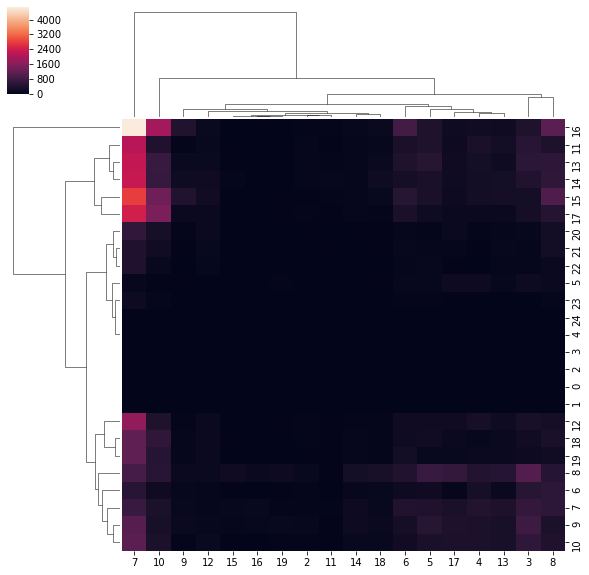

In [10]:
sns.clustermap(Absolute_Values_Hourly[range(2,20)])

<AxesSubplot:>

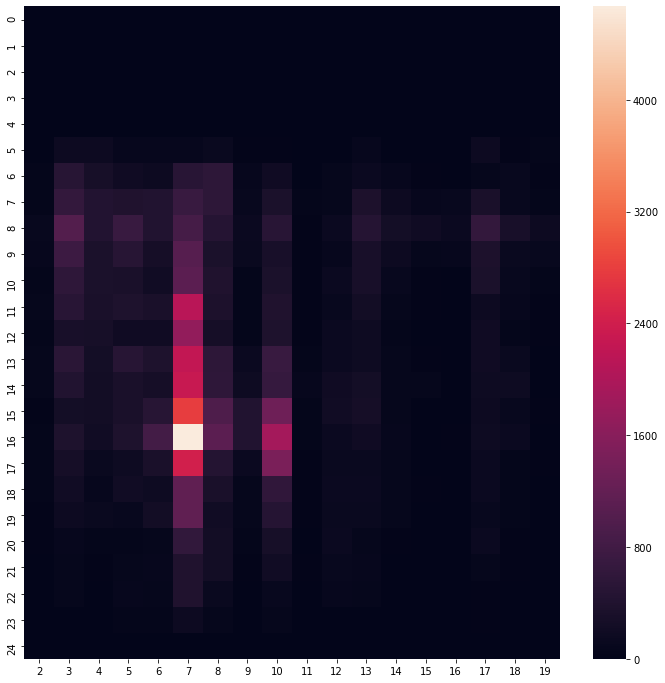

In [11]:
plt.figure(figsize = (12,12))
sns.heatmap(Absolute_Values_Hourly[range(2,20)])

In [12]:
Dane_Ostateczne_Processing

,card_num,date,week_day,time,begin_id,end_id
0,1047220043,2021-09-01,2,04:24:00,8,150
1,1047220043,2021-09-01,2,14:05:00,5,66
2,1047220043,2021-09-02,3,04:24:00,8,150
3,1047220043,2021-09-02,3,13:29:00,5,66
4,1047220043,2021-09-03,4,04:24:00,8,150
...,...,...,...,...,...,...
359468,501031531,2021-10-05,1,07:05:00,20,65
359469,501031531,2021-10-05,1,07:05:00,20,65
359470,501031531,2021-10-05,1,07:05:00,20,65
359471,501031531,2021-10-05,1,07:05:00,20,65


### Przystanki i Dni tygodnia

Tutaj Eksplorujemy dane dotyczące Dni Tygodnia i Tygodniowego natężenia ruchu. Mozna zauważyć, że dla prawie każego połączenia weekendy są stosunkowo wolne od ruchu w przeciwieństwie do tygodnia pracy. Można też wydzielić linie które są najbardziej aktywne podczas tygodnia

In [27]:
#### Zwracanie Tabelki zgrupowanych ilości wsiadających 

import pandas as pd
import numpy as np
Dane_Ostateczne=Dane_Ostateczne_Processing



df_hourly = pd.DataFrame(index = range(0,7), columns = Dane_Ostateczne['begin_id'].sort_values().unique())

def create_daily_data(Dane_Ostateczne):
    return     Dane_Ostateczne.groupby('week_day').count()['begin_id']
temp_arr_2 = np.zeros(len(df_hourly.index))

for i in df_hourly.columns:
    temp_arr = np.zeros(len(df_hourly.index))

    temp_df = Dane_Ostateczne[Dane_Ostateczne['begin_id'] ==i].sort_values(by='begin_id')
    list_temp = create_daily_data(temp_df)
    for j in range(0,7):
        try:
            temp_arr[j] = list_temp.loc[j]
        except:
            temp_arr[j]=0
    temp_arr_2 = np.vstack((temp_arr_2,temp_arr))

temp_arr_2

array([[0.000e+00, 0.000e+00, 0.000e+00, ..., 0.000e+00, 0.000e+00,
        0.000e+00],
       [1.290e+02, 1.620e+02, 1.360e+02, ..., 1.700e+02, 7.100e+01,
        2.200e+01],
       [1.277e+03, 1.362e+03, 1.423e+03, ..., 1.375e+03, 5.210e+02,
        1.920e+02],
       ...,
       [1.060e+02, 1.250e+02, 1.200e+02, ..., 1.060e+02, 2.800e+01,
        2.000e+01],
       [0.000e+00, 0.000e+00, 3.000e+00, ..., 1.000e+00, 0.000e+00,
        0.000e+00],
       [8.000e+00, 1.200e+01, 8.000e+00, ..., 5.000e+00, 1.000e+00,
        0.000e+00]])

In [28]:
Weekly_frame = pd.DataFrame(temp_arr_2[1:,:].T,columns = Dane_Ostateczne['end_id'].sort_values().unique())

ValueError: Shape of passed values is (7, 308), indices imply (7, 317)

In [ ]:
Weekly_frame

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

fig = plt.figure()


#Rozkład Całodzienny na Danym przystanku. 

ax = fig.add_axes([0,0,1,1])
ax.bar(Weekly_frame.index,Weekly_frame[127])
plt.show()

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

fig = plt.figure()


#Rozkład Całodzienny na Danym przystanku. 

ax = fig.add_axes([0,0,1,1])
ax.bar(Weekly_frame.index,Weekly_frame.sum(axis = 1))
plt.show()

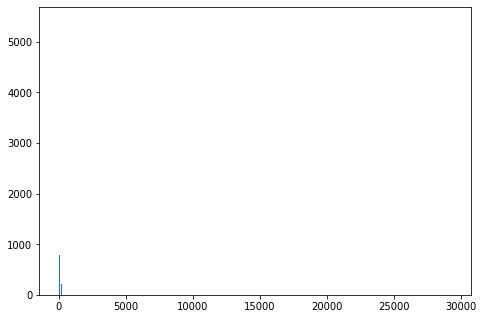

In [22]:
#Rozkład na każdym przystanku o danej godzinie 
fig = plt.figure()

ax = fig.add_axes([0,0,1,1])
ax.bar(Weekly_frame.T.index,Weekly_frame.T[1])
plt.show()

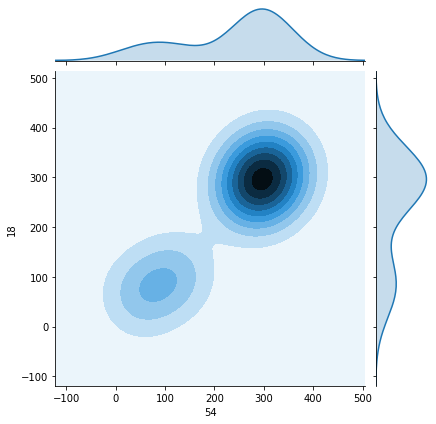

In [23]:
sns.jointplot(x =Weekly_frame[54],y=Weekly_frame[18],kind = 'kde')

<Figure size 864x864 with 0 Axes>

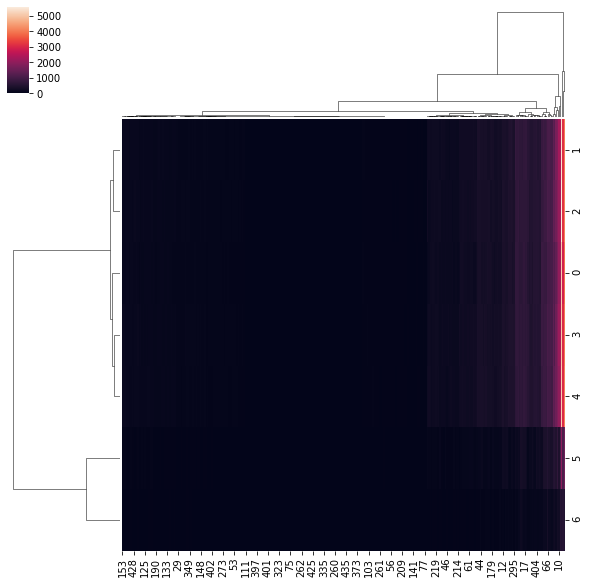

In [24]:
plt.figure(figsize = (12,12))
sns.clustermap(Weekly_frame)

<AxesSubplot:>

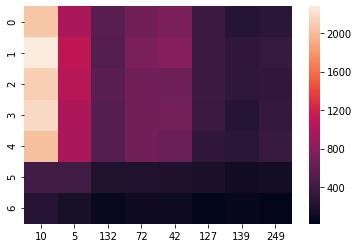

In [25]:
sns.heatmap(Weekly_frame[[10,5,132,72,42,127,139,249]])

In [250]:
Dane_Ostateczne_Processing

,card_num,date,week_day,time,begin_id,end_id
0,1047220043,2021-09-01,2,04:24:00,8,150
1,1047220043,2021-09-01,2,14:05:00,5,66
2,1047220043,2021-09-02,3,04:24:00,8,150
3,1047220043,2021-09-02,3,13:29:00,5,66
4,1047220043,2021-09-03,4,04:24:00,8,150
...,...,...,...,...,...,...
359532,501031531,2021-10-05,1,07:05:00,20,65
359533,501031531,2021-10-05,1,07:05:00,20,65
359534,501031531,2021-10-05,1,07:05:00,20,65
359535,501031531,2021-10-05,1,07:05:00,20,65


### Dane miesięczne z dnia na dzień

Można tutaj zauważyć cykliczność tygodnia i że niemalże każda linia jest tutaj do siebie podobna

In [251]:
#### 

import pandas as pd
import numpy as np
Dane_Ostateczne=Dane_Ostateczne_Processing



df_hourly = pd.DataFrame(index = range(len(Dane_Ostateczne_Processing['date'].unique())), columns = Dane_Ostateczne['begin_id'].sort_values().unique())

def create_daily_data(Dane_Ostateczne):
    
    return     Dane_Ostateczne.groupby('date').count()['begin_id']

temp_arr_2 = np.zeros(len(df_hourly.index))
#print(temp_arr_2)


for i in df_hourly.columns:
    temp_arr = np.zeros(len(df_hourly.index))

    temp_df = Dane_Ostateczne[Dane_Ostateczne['begin_id'] ==i].sort_values(by='begin_id')
    list_temp = create_daily_data(temp_df)
    #print(list_temp)
    for j in range(len(Dane_Ostateczne_Processing['date'].unique())):
        try:
            temp_arr[j] = list_temp.iloc[j]
        except:
            temp_arr[j]=0
    temp_arr_2 = np.vstack((temp_arr_2,temp_arr))



In [252]:
Daily_frame = pd.DataFrame(temp_arr_2[1:,:].T,columns = Dane_Ostateczne['begin_id'].sort_values().unique(),index=Dane_Ostateczne_Processing['date'].unique())
Daily_frame

,2,3,4,5,6,7,8,9,10,11,...,407,410,416,417,418,424,425,428,434,435
2021-09-01,35.0,254.0,156.0,193.0,184.0,1135.0,275.0,68.0,325.0,20.0,...,1.0,1.0,1.0,54.0,1.0,5.0,2.0,21.0,1.0,1.0
2021-09-02,35.0,283.0,160.0,224.0,218.0,1089.0,331.0,85.0,442.0,23.0,...,1.0,1.0,3.0,46.0,2.0,3.0,1.0,25.0,1.0,1.0
2021-09-03,40.0,288.0,170.0,192.0,205.0,1058.0,322.0,90.0,477.0,25.0,...,1.0,4.0,3.0,57.0,1.0,5.0,1.0,19.0,1.0,4.0
2021-09-06,19.0,104.0,87.0,89.0,79.0,458.0,98.0,15.0,89.0,6.0,...,1.0,1.0,4.0,13.0,1.0,2.0,1.0,3.0,2.0,2.0
2021-09-07,10.0,46.0,40.0,25.0,27.0,83.0,32.0,10.0,53.0,3.0,...,1.0,1.0,9.0,4.0,1.0,2.0,1.0,3.0,1.0,1.0
2021-09-08,28.0,246.0,166.0,201.0,214.0,1087.0,302.0,88.0,416.0,27.0,...,0.0,3.0,6.0,40.0,1.0,7.0,2.0,20.0,0.0,3.0
2021-09-09,27.0,269.0,177.0,204.0,233.0,1092.0,351.0,99.0,468.0,18.0,...,0.0,3.0,8.0,50.0,2.0,5.0,3.0,24.0,0.0,2.0
2021-09-10,23.0,272.0,178.0,207.0,178.0,1182.0,353.0,88.0,453.0,13.0,...,0.0,2.0,3.0,64.0,1.0,7.0,1.0,24.0,0.0,1.0
2021-09-13,31.0,279.0,185.0,195.0,203.0,1043.0,323.0,92.0,440.0,22.0,...,0.0,3.0,1.0,48.0,1.0,6.0,2.0,18.0,0.0,2.0
2021-09-14,39.0,287.0,181.0,192.0,197.0,1130.0,307.0,92.0,421.0,20.0,...,0.0,3.0,4.0,47.0,0.0,10.0,1.0,24.0,0.0,4.0


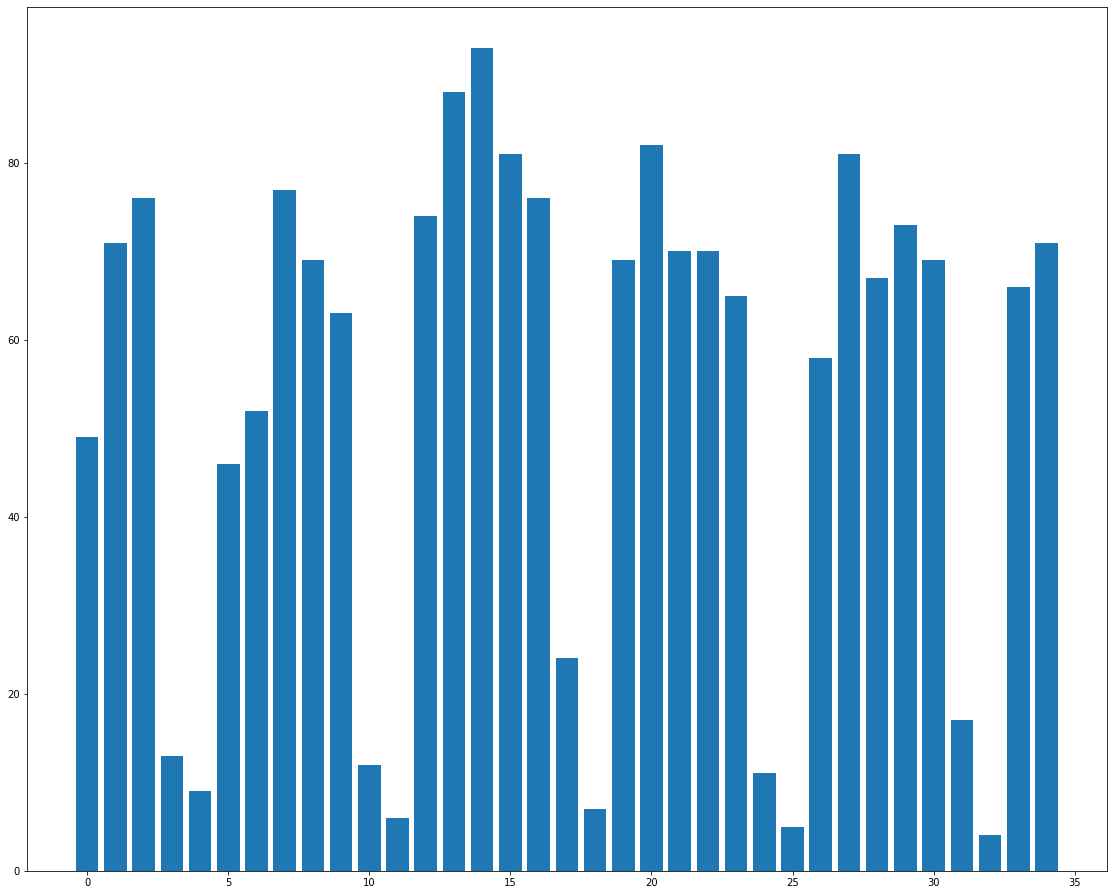

In [253]:
import seaborn as sns
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(15,12))


#Rozkład Całodzienny na Danym przystanku. 

ax = fig.add_axes([0,0,1,1])
ax.bar(range(len(Daily_frame.index)),Daily_frame[23])
plt.show()

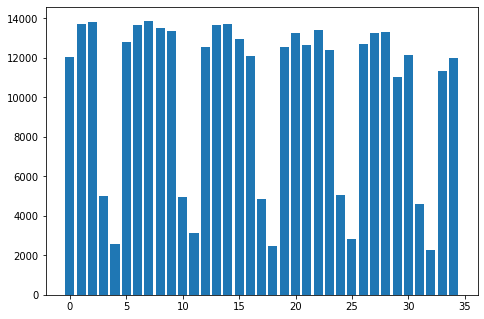

In [254]:
import seaborn as sns
import matplotlib.pyplot as plt

fig = plt.figure()


#Rozkład Całodzienny na Danym przystanku. 

ax = fig.add_axes([0,0,1,1])
ax.bar(range(len(Daily_frame.index)),Daily_frame.sum(axis = 1))
plt.show()

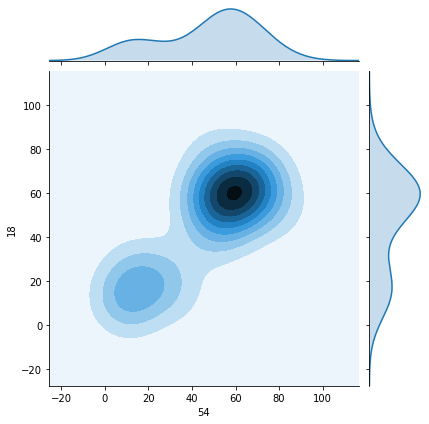

In [255]:
sns.jointplot(x =Daily_frame[54],y=Daily_frame[18],kind = 'kde')